## EDA

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [13]:
df.shape

(21597, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df['waterfront'].fillna('NO', inplace=True)
df['view'].fillna('NONE', inplace=True)
df['yr_renovated'].fillna(0, inplace=True)

df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.020645,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.202555,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.010612,0.117855,0.017900,0.047177,0.051060,0.004979,0.003793,0.020645,-0.202555,1.000000,0.062397,0.027970,-0.064543,0.000683,0.004286


In [8]:
dfreno = df[df['yr_renovated'] > 0]
dfreno.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,7.440000e+02,7.440000e+02,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,4.418716e+09,7.689019e+05,3.459677,2.306116,2327.377688,16215.530914,1.504704,1878.719086,1939.455645,1995.928763,98095.623656,47.580564,-122.262043,1988.877688,13390.768817
std,2.908265e+09,6.271258e+05,1.068823,0.898233,1089.002040,38235.308760,0.493202,849.441413,22.088850,15.599946,54.861316,0.120855,0.129586,715.440144,26213.648057
min,3.600057e+06,1.100000e+05,1.000000,0.750000,520.000000,1024.000000,1.000000,520.000000,1900.000000,1934.000000,98001.000000,47.196000,-122.497000,828.000000,1281.000000
25%,1.922985e+09,4.122500e+05,3.000000,1.750000,1560.000000,5000.000000,1.000000,1267.500000,1921.000000,1987.000000,98040.000000,47.523350,-122.358000,1460.000000,5000.000000
50%,3.899100e+09,6.075020e+05,3.000000,2.250000,2200.000000,7375.000000,1.500000,1730.000000,1941.500000,2000.000000,98112.000000,47.602800,-122.292000,1850.000000,7455.000000
75%,7.014200e+09,9.000000e+05,4.000000,2.750000,2872.500000,12670.750000,2.000000,2300.000000,1955.000000,2007.250000,98126.000000,47.670950,-122.210000,2380.000000,10925.750000
max,9.829200e+09,7.700000e+06,11.000000,8.000000,12050.000000,478288.000000,3.000000,8570.000000,2003.000000,2015.000000,98199.000000,47.777000,-121.359000,5500.000000,310582.000000


In [9]:
dfnoreno = df[df['yr_renovated'] == 0]
dfnoreno.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.085300e+04,2.085300e+04,20853.000000,20853.000000,20853.000000,2.085300e+04,20853.000000,20853.000000,20853.000000,20853.0,20853.000000,20853.000000,20853.000000,20853.000000,20853.000000
mean,4.586246e+09,5.321403e+05,3.370115,2.109037,2071.507313,1.505959e+04,1.493718,1785.381432,1972.125114,0.0,98077.321345,47.559363,-122.212268,1986.539778,12735.717499
std,2.875507e+09,3.518947e+05,0.920686,0.763118,910.209733,4.152180e+04,0.541274,826.815098,28.974784,0.0,53.357658,0.139088,0.140805,684.145745,27311.862519
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.0,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.125059e+09,3.200000e+05,3.000000,1.500000,1420.000000,5.050000e+03,1.000000,1190.000000,1953.000000,0.0,98032.000000,47.468600,-122.327000,1490.000000,5100.000000
50%,3.904931e+09,4.490000e+05,3.000000,2.250000,1900.000000,7.620000e+03,1.500000,1560.000000,1976.000000,0.0,98065.000000,47.570600,-122.227000,1840.000000,7622.000000
75%,7.326200e+09,6.350000e+05,4.000000,2.500000,2540.000000,1.062600e+04,2.000000,2210.000000,1998.000000,0.0,98117.000000,47.678300,-122.123000,2360.000000,10061.000000
max,9.900000e+09,6.890000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,0.0,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [18]:
# Create age feature
df['age'] = 2022 - df['yr_built']

# Create is_renovated featire
df['is_renovated'] = df['yr_renovated'] != 0

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,is_renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,67,False
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,71,True
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,89,False
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,57,False
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,35,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,13,False
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,8,False
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,13,False
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,18,False


In [16]:
formula = "price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + age"
all_mod = ols(formula=formula, data=df).fit()
all_mod_summ = all_mod.summary()
all_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     4511.
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:48:38   Log-Likelihood:            -2.9862e+05
No. Observations:               21597   AIC:                         5.972e+05
Df Residuals:                   21590   BIC:                         5.973e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.498e+05   1.01e+04    -24.806      0.000    -2.7e+05    -2.3e+05
bedrooms      -6.9e+04   2253.108    -30.624      0.000   -7.34e+04   -6.46e+04
bathrooms    6.747e+04   3851.524     17.517      0.000    5.99e+04     7.5e+04
sqft_living   303.7673      3.000    101.249      0.000     297.887     309.648
sqft_lot       -0.3015      0.041     -7.329      0.000      -0.382      -0.221
floors       5.421e+04   3778.051     14.350      0.000    4.68e+04    6.16e+04
age          3367.6180     70.002     48.107      0.000    3230.408    3504.828
==============================================================================
Omnibus:                    14312.566   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           522258.106
Skew:                           2.680   Prob(JB):                         0.00
Kurtosis:                      26.487   Cond. No.                     2.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

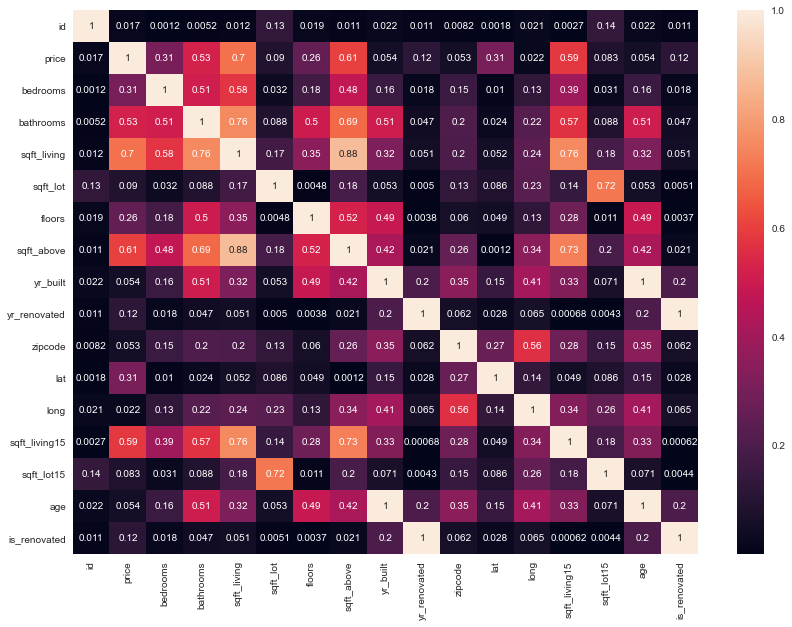

In [17]:
fig, ax = plt.subplots(figsize=(14,10))

sns.heatmap(df.corr().abs(), annot=True)